If the kernel pass to the black area the variant can not be significant and when pass to the edge the changes of the magnitude its to large.

When sobel x and y can be mark the contour of the image and then with this we can identify the change for determinate FLAT, EDGE, CORNER.
When aply the gradient magnitud we have points and this poins can be analizate with PCA, this method indentify the components of the poins (lines where the poins goes) and then we would indentify the edge and corners with the lines. We have to apply the covarianza en y and x because this value said the dirección of the points.
The covarianza matrix 
After that we have to calculate de eigen values with the eigenmatrix and then we have to definine the edge, corner an flat with a grafica witch have eig1 and eig2. And also we can use other grafic with a new parameter R and this R can be calculate (min(eig1,eige2))


(-0.5, 1180.5, 786.5, -0.5)

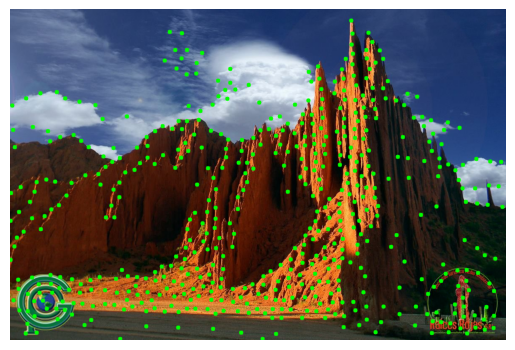

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('landscape.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
corners =cv2.goodFeaturesToTrack(image=gray,
                                 maxCorners=900,
                                qualityLevel=0.01,
                                minDistance=20)
corners=np.array(list(map(np.int_,corners)))
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),5,(0,255,0),-1)
plt.imshow(rgb)
plt.axis('off')


/tmp/ipykernel_16141/3148582019.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


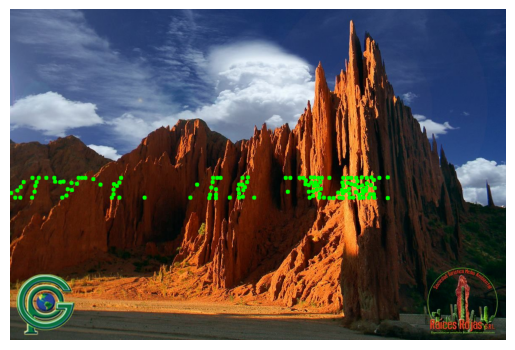

In [14]:

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = np.zeros_like(gray)
roi = (0, 400, 900, 50)  
mask[roi[1]:roi[1] + roi[3], roi[0]:roi[0] + roi[2]] = 1


gray_masked = cv2.bitwise_and(gray, gray, mask=mask)



corners = cv2.goodFeaturesToTrack(image=gray_masked,
                                 maxCorners=200,
                                 qualityLevel=0.01,
                                 minDistance=8)
corners = np.int0(corners)

# Dibujar círculos en las esquinas detectadas
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(rgb, (x, y), 5, (0, 255, 0), -1)

# Mostrar la imagen con las esquinas detectadas
plt.imshow(rgb)
plt.axis('off')
plt.show()

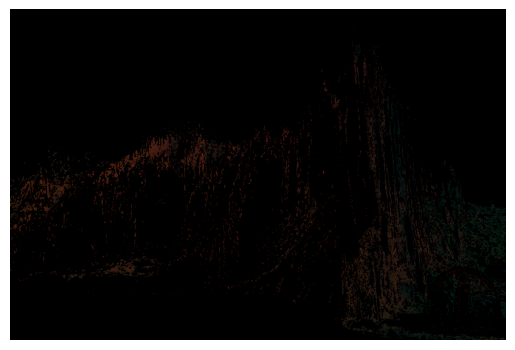

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


image = cv2.imread('landscape.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('landscape.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_orange = np.array([0, 15,14])
upper_orange = np.array([255, 35,20])

mask = cv2.inRange(rgb, lower_orange, upper_orange)

masked_image = cv2.bitwise_and(rgb, rgb, mask=mask)

plt.imshow(masked_image,cmap='gray')
plt.axis('off')
plt.show()

/tmp/ipykernel_16141/197898139.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


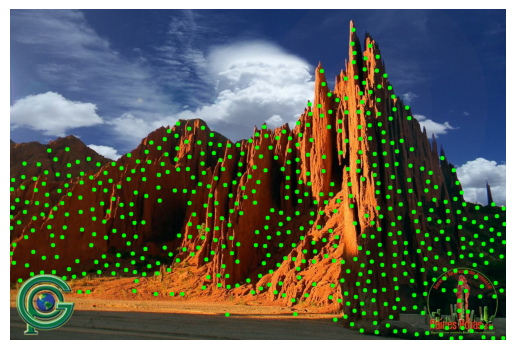

In [16]:

gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)


corners = cv2.goodFeaturesToTrack(image=gray,
                                  maxCorners=3000,
                                  qualityLevel=0.09,
                                  minDistance=21)
corners = np.int0(corners)


for corner in corners:
    x, y = corner.ravel()
    cv2.circle(rgb, (x, y), 5, (0, 255, 0), -1)

plt.imshow(rgb)
plt.axis('off')
plt.show()


The algorith gointo save the values of corners of edge in keypoints with arrays called feature,word(k=[i;i])